# Baseball Case Study : 

## Project Description
### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


### Input features-
#### W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
#### R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
#### AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
#### H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
#### 2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
#### 3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
#### HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
#### BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
#### SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
#### SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
#### RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
#### ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
#### ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
#### CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
#### SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
#### SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
#### E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.


# -- Output: Number of predicted wins (W)


# 1. Import Important Libraries : 

In [1]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns 

from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error, r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV

# 2. Load dataset : 

In [2]:
df = pd.read_csv("/Users/sneha/Downloads/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# 3. Perfrom EDA 

In [3]:
df.shape

(30, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
df.isnull().any()

W      False
R      False
AB     False
H      False
2B     False
3B     False
HR     False
BB     False
SO     False
SB     False
RA     False
ER     False
ERA    False
CG     False
SHO    False
SV     False
E      False
dtype: bool

In [7]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [8]:
df['CG'].value_counts()

1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64

# 4. Split the dataset:  

In [8]:
X = df.drop(columns=['W'])   #input features
y = df['W']  # output 

# 5. Visualise the dataset : 

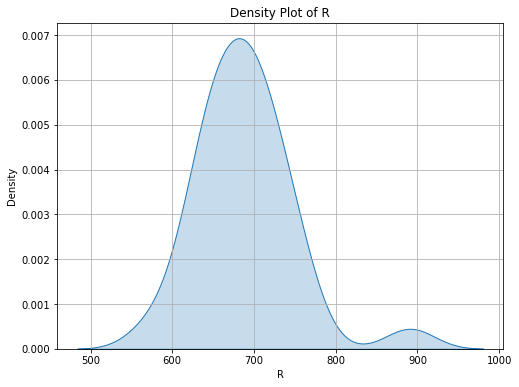

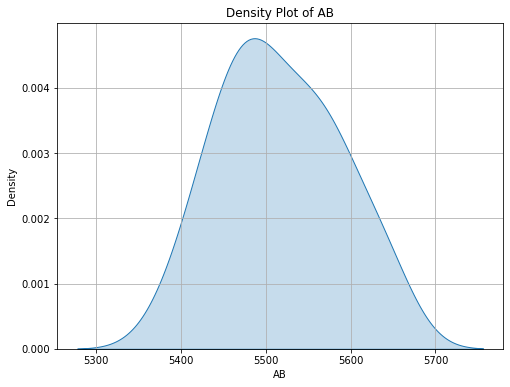

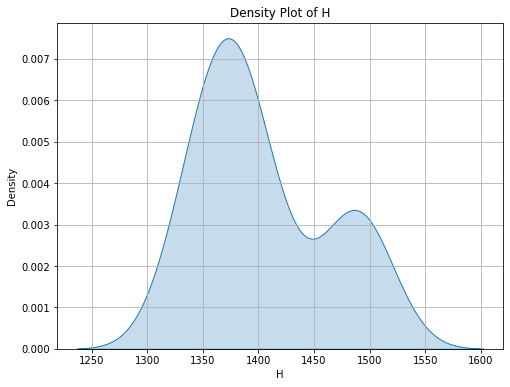

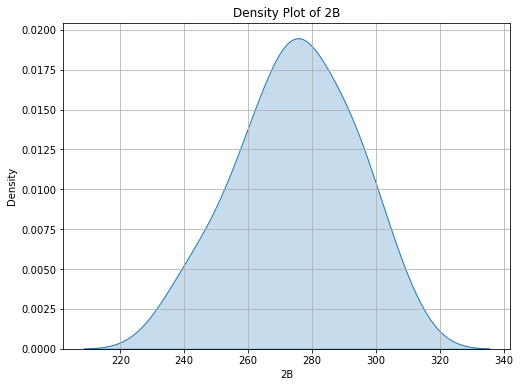

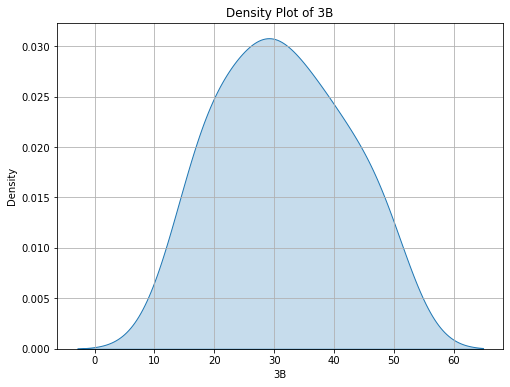

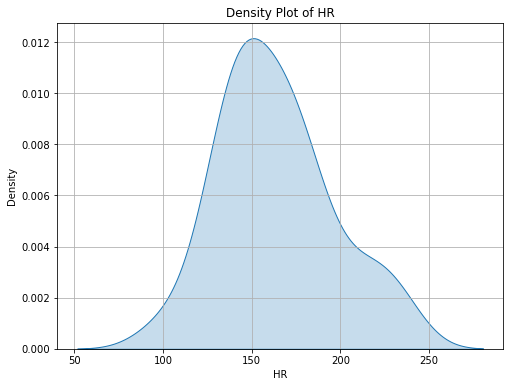

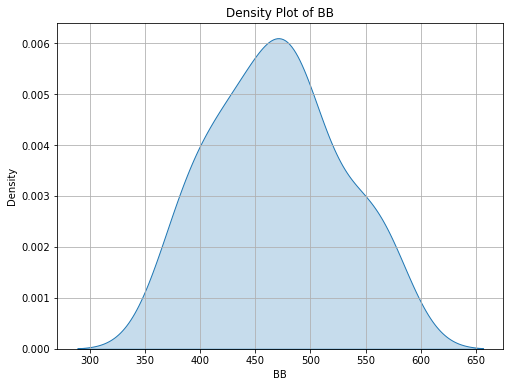

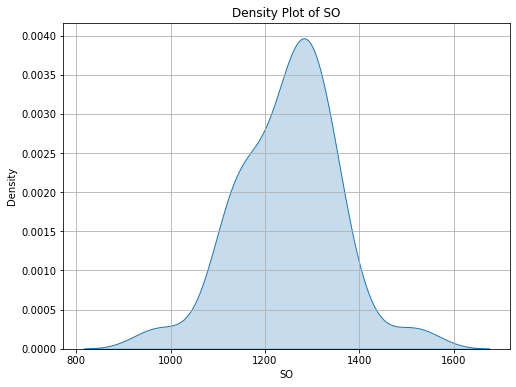

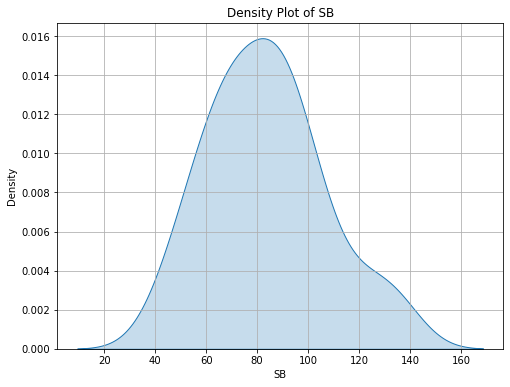

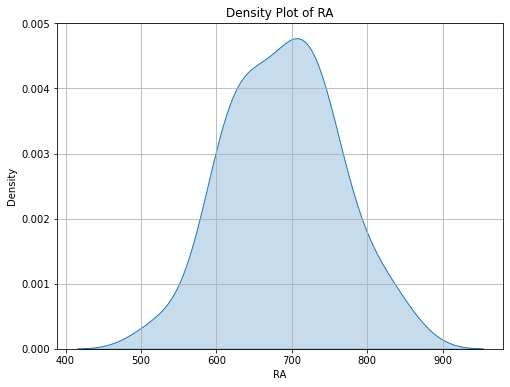

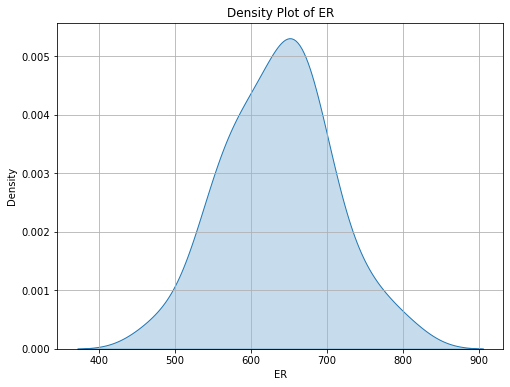

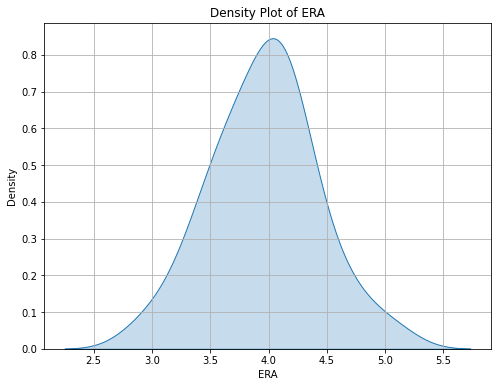

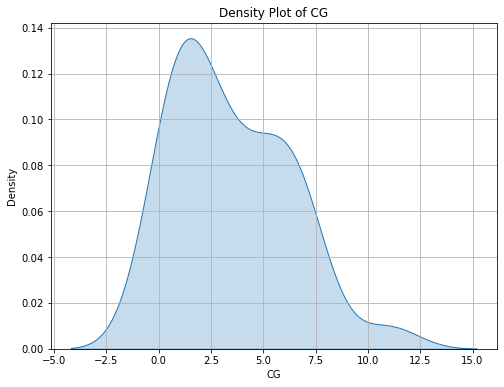

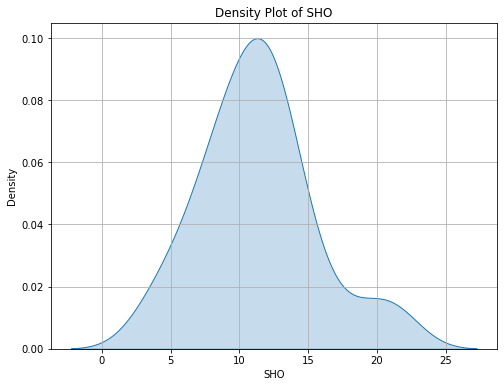

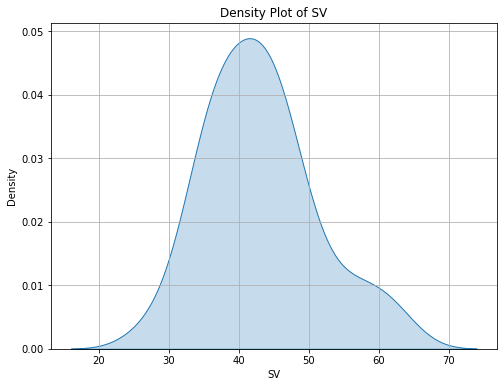

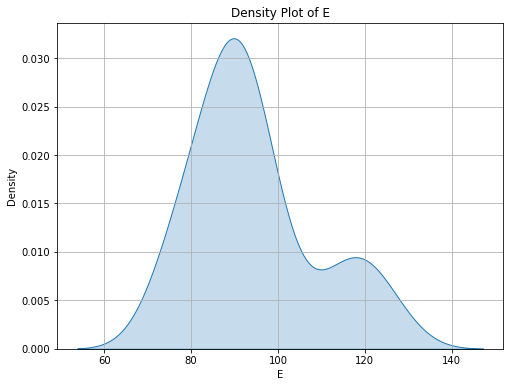

In [9]:
# Loop through each feature and create density plots
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


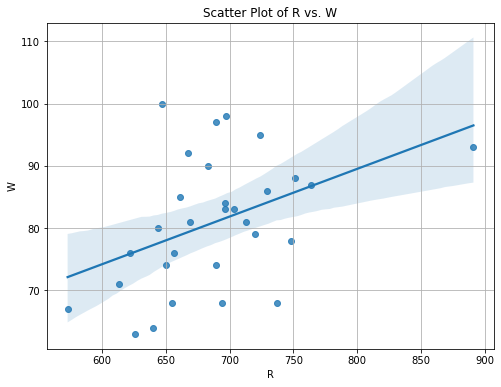

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


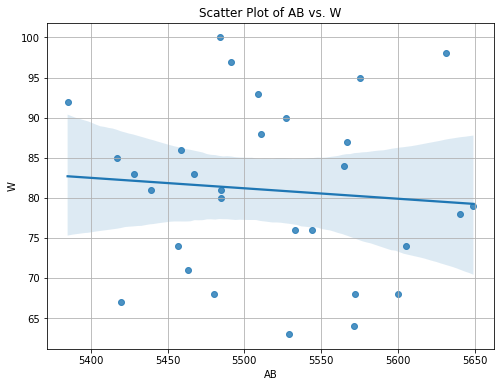

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


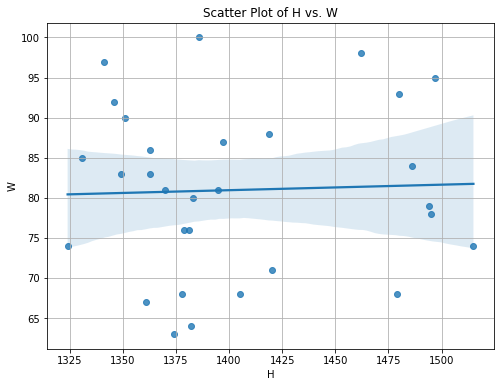

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


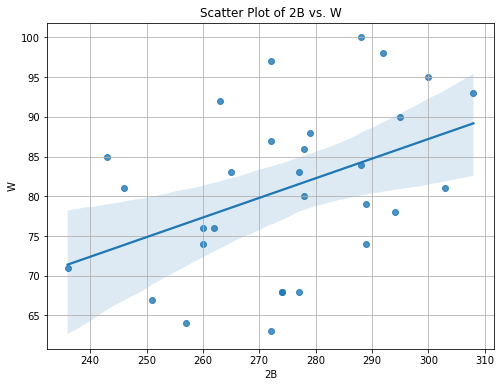

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


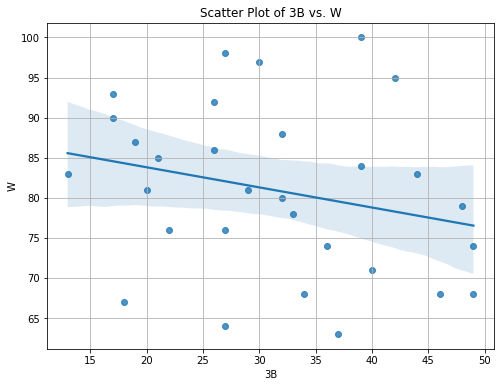

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


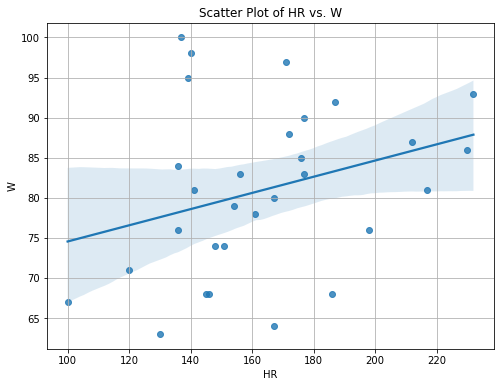

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


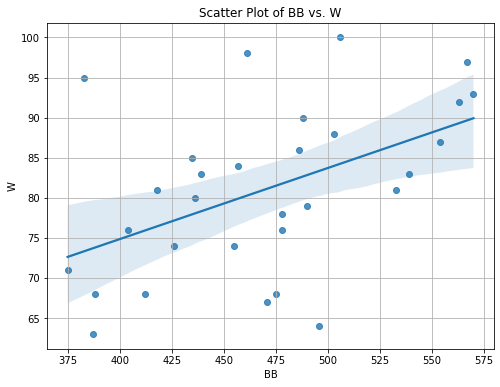

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


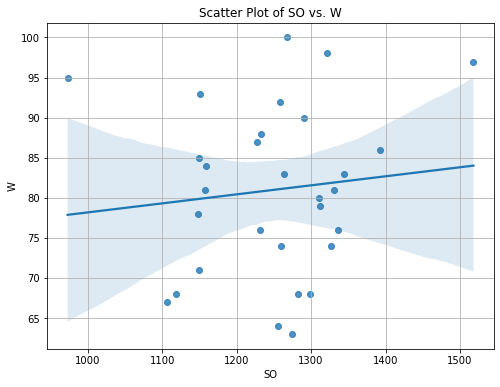

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


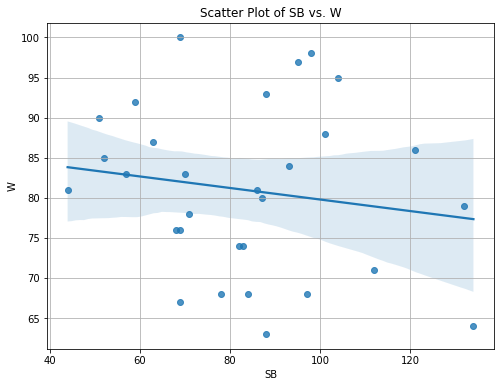

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


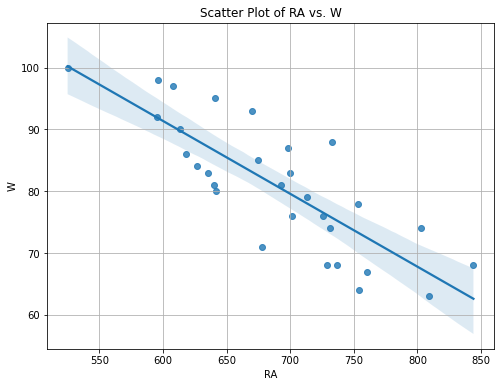

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


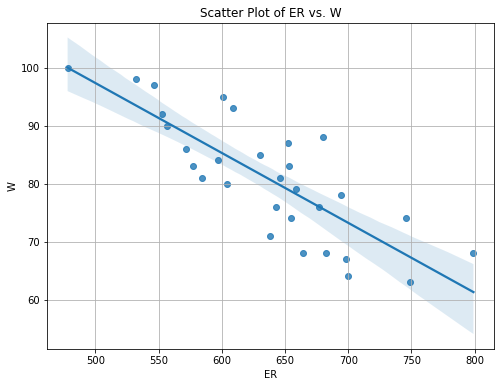

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


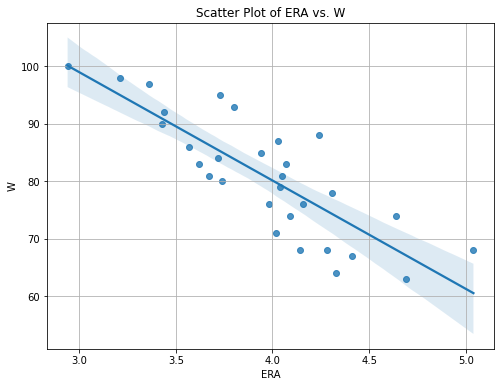

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


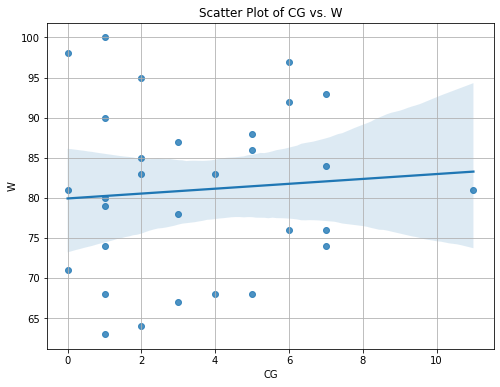

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


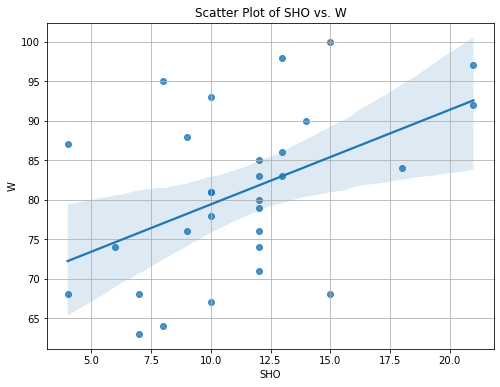

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


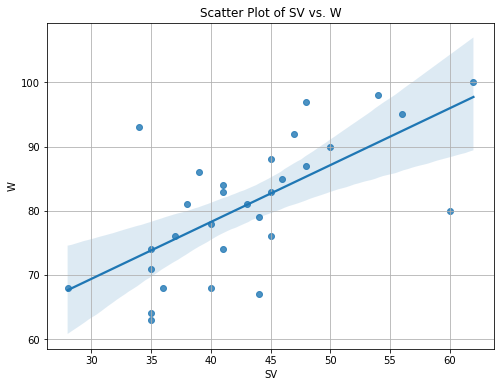

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


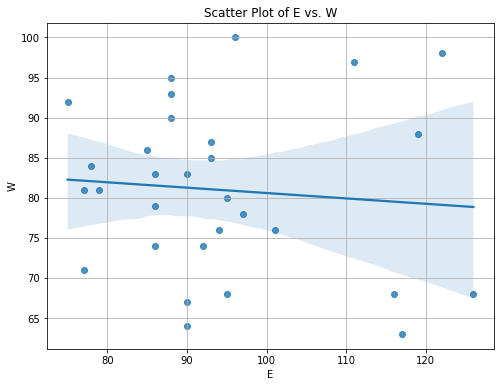

In [10]:
# Loop through each input feature
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(X[feature], y)
    plt.title(f'Scatter Plot of {feature} vs. W')
    plt.xlabel(feature)
    plt.ylabel('W')
    plt.grid(True)
    plt.show()

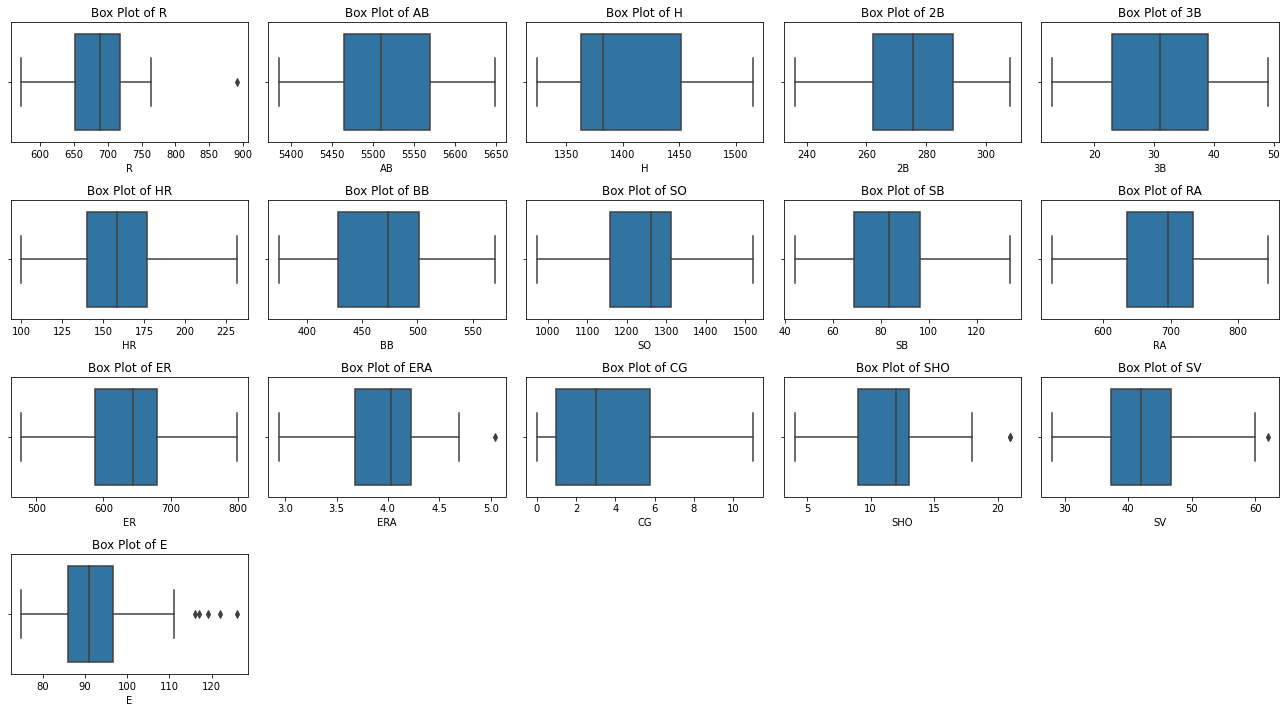

In [11]:
# Create subplots for each column in the dataset
plt.figure(figsize=(18, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 5, i)  # Create a 4x5 grid of subplots (adjust grid size as needed)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Adjust subplot spacing for better readability
plt.show()

In [12]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


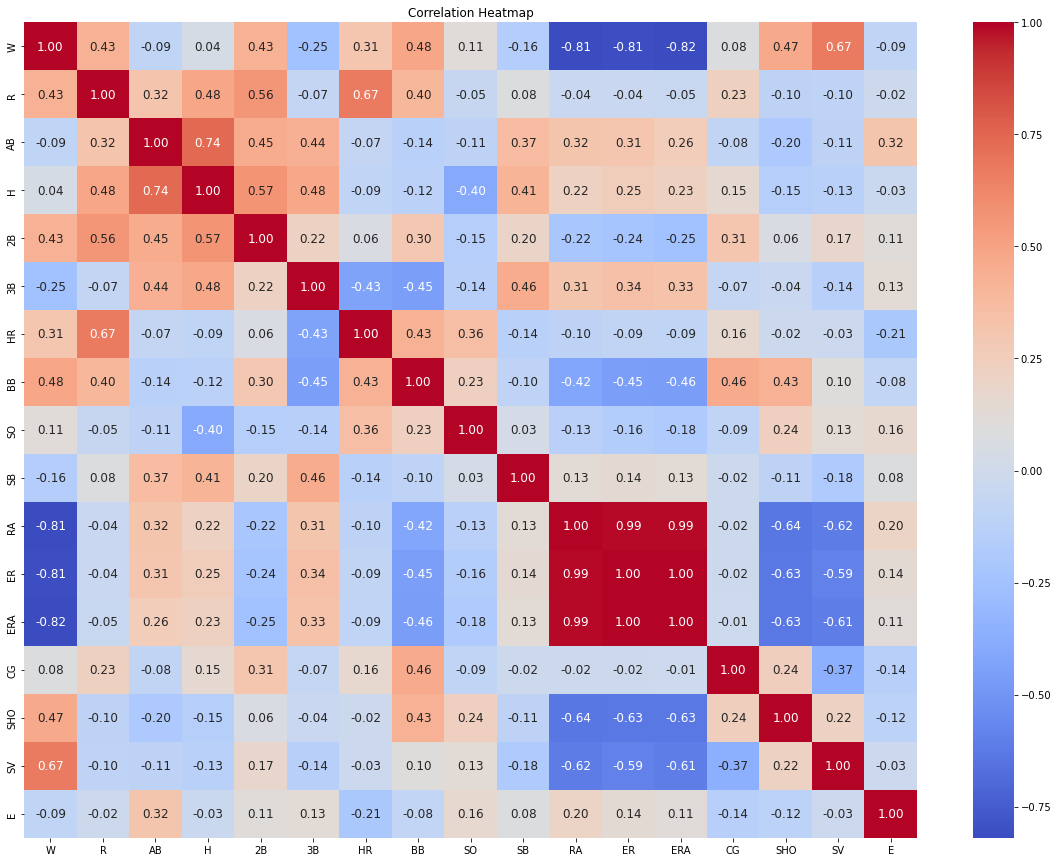

In [13]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

## Conclusions : 
The correlation matrix above shows the correlation coefficients between the "Wins" (W) and other features in the dataset. Correlation coefficients indicate the strength and direction of the linear relationship between two variables. Here are some key observations based on the correlation matrix:

1. **Positive Correlations with Wins (W)**:
   - Runs (R) has a positive correlation of approximately 0.43 with Wins. This suggests that as the number of runs scored by the team increases, the number of wins tends to increase as well.
   - Home Runs (HR), Base on Balls (BB), Shutouts (SHO), and Saves (SV) also show positive correlations with Wins, though the correlations are not as strong as Runs.

2. **Negative Correlations with Wins (W)**:
   - Earned Run Average (ERA), Earned Runs (ER), and Runs Allowed (RA) have strong negative correlations with Wins. This means that as these pitching-related statistics increase (indicating poorer performance), the number of wins tends to decrease.
   - Errors (E) has a weak negative correlation with Wins, suggesting that a higher number of errors may be associated with fewer wins.

3. **Weak Correlations with Wins (W)**:
   - Other offensive statistics like At Bats (AB), Hits (H), Doubles (2B), Triples (3B), and Stolen Bases (SB) have relatively weak correlations with Wins, indicating that they may have less direct impact on the number of wins.

4. **Pitching Performance and Defense**:
   - Pitching-related statistics (ERA, ER, RA) show strong correlations with Wins. This underscores the importance of strong pitching and defense in achieving more wins in baseball.

5. **Clustering of Correlated Features**:
   - Runs (R), Home Runs (HR), Base on Balls (BB), and Shutouts (SHO) are positively correlated with each other and with Wins. These features represent offensive and defensive performance that can contribute to winning games.
   - Earned Run Average (ERA), Earned Runs (ER), and Runs Allowed (RA) are strongly negatively correlated with Wins. These features represent pitching performance and the ability to prevent opposing teams from scoring.

Overall, this correlation analysis provides valuable insights into the factors that influence the number of wins in baseball. Strong pitching and defense, as well as effective offensive performance, are key contributors to a team's success in terms of wins. Teams with lower ERA, ER, and RA tend to win more games, while those with higher Runs and HR also tend to perform well.

# 6. Identifying and Handling the Outliers : 

In [14]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(df)

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

df.iloc[outlier_indices]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


## From above I can infer than : 
Based on the provided statistics and the outlier rows you mentioned (rows 5 and 29), let's specifically analyze and confirm which features have outliers in these rows:

Outliers in Row 5:
- Runs (R) is 891, which is significantly higher than the maximum value (718.25) observed in the dataset.
- Doubles (2B) is 308, which is higher than the maximum value (288.75).
- Triples (3B) is 17, which is within the observed range.
- Home Runs (HR) is 232, which is significantly higher than the maximum value (177).
- Base on Balls (BB) is 570, which is higher than the maximum value (501.25).
- Stolen Bases (SB) is 88, which is within the observed range.
- Earned Runs (ER) is 609, which is significantly higher than the maximum value (679.25).
- Earned Run Average (ERA) is 3.80, which is within the observed range.
- Shutouts (SHO) is 10, which is within the observed range.
- Saves (SV) is 34, which is higher than the maximum value (46.75).
- Errors (E) is 88, which is within the observed range.

Outliers in Row 29:
- Runs (R) is 737, which is significantly higher than the maximum value (718.25).
- Doubles (2B) is 274, which is higher than the maximum value (288.75).
- Triples (3B) is 49, which is significantly higher than the maximum value (39).
- Home Runs (HR) is 186, which is significantly higher than the maximum value (177).
- Base on Balls (BB) is 388, which is significantly higher than the maximum value (501.25).
- Stolen Bases (SB) is 97, which is significantly higher than the maximum value (96.5).
- Earned Runs (ER) is 844, which is significantly higher than the maximum value (679.25).
- Earned Run Average (ERA) is 5.04, which is higher than the maximum value (4.22).
- Shutouts (SHO) is 4, which is within the observed range.
- Saves (SV) is 36, which is within the observed range.
- Errors (E) is 95, which is significantly higher than the maximum value (96.75).

Based on this analysis, the following features have outliers in one or both of the mentioned rows: Runs (R), Doubles (2B), Triples (3B), Home Runs (HR), Base on Balls (BB), Stolen Bases (SB), Earned Runs (ER), Earned Run Average (ERA), and Errors (E).

In [15]:
columns_to_cap = ['R', 'ER', 'ERA', 'SHO', 'SV']

percentile_threshold = 95

rows_to_cap = [5, 29]

for row_index in rows_to_cap:
    for col in columns_to_cap:
        threshold = df[col].quantile(percentile_threshold / 100)
        capped_value  = min(df.at[row_index, col], threshold)
        df.at[row_index, col] = capped_value

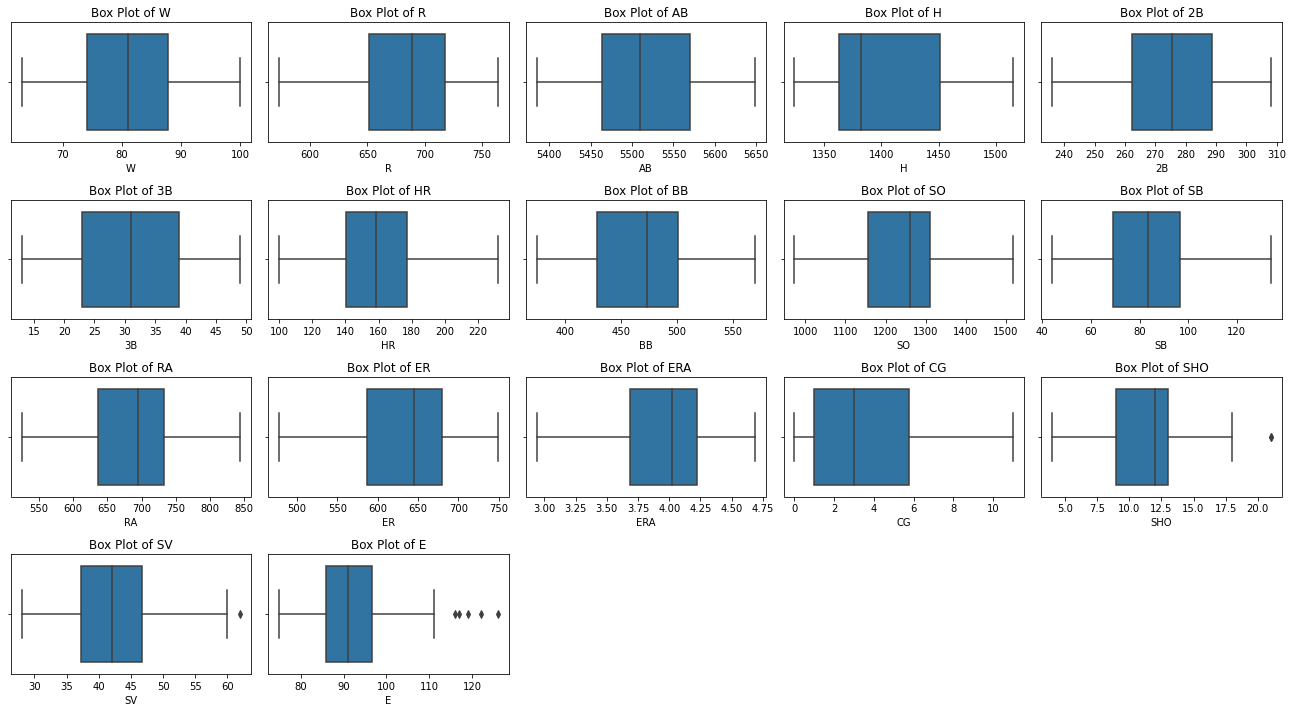

In [16]:
# Create subplots for each column in the dataset
plt.figure(figsize=(18, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 5, i)  # Create a 4x5 grid of subplots (adjust grid size as needed)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Adjust subplot spacing for better readability
plt.show()

# 7. Check for VIF , we do know we have some highly co related variables. Lets see for them. 

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["Variable"] = df.columns

vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif

,Variable,VIF
0,W,659.921883
1,R,1622.590798
2,AB,4114.301434
3,H,3432.038411
4,2B,748.362220
5,3B,36.087801
6,HR,143.852876
7,BB,234.674904
8,SO,379.915484
9,SB,29.678675


# The variables R, AB, H, 2B, HR, BB, SO, RA, ER, ERA, SV, and E have VIF values greater than 10, indicating high multicollinearity.



To address multicollinearity, we can consider the following actions:

Feature Selection: Remove some of the highly correlated variables from model. Start by removing those with the highest VIF values and assess how it affects model's performance.

Feature Engineering: Create new variables that are combinations or transformations of existing variables, which might help reduce multicollinearity.

Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can be used to transform  variables into linearly uncorrelated variables (principal components). However, this comes at the cost of interpretability, as the principal components may not have clear meanings.

# MODEL 1 : WITHOUT HANDLING MULTICOLINEARITY. 

## Using Ridge / Lasso Regression as these two regressor are least sensitive toMulticolinearity 

Ridge Regression Mean Squared Error: 4.726558491493871
Lasso Regression Mean Squared Error: 4.703170810182038
Ridge Regression R-squared: 0.8341062734640138
Lasso Regression R-squared: 0.8357439430464231


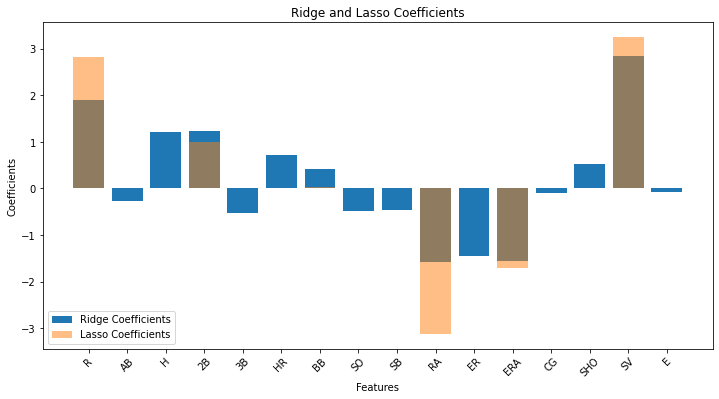

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt


# Load your dataset (replace 'data.csv' with your dataset file)

# Define your features (X) and target variable (y)
X = df.drop(columns=['W'])  
y = df['W']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=10.0)  
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the models
ridge_mse = sqrt(mean_squared_error(y_test, ridge_predictions))
lasso_mse = sqrt(mean_squared_error(y_test, lasso_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Ridge Regression Mean Squared Error:", ridge_mse)
print("Lasso Regression Mean Squared Error:", lasso_mse)

print("Ridge Regression R-squared:", ridge_r2)
print("Lasso Regression R-squared:", lasso_r2)



# Visualize the coefficients of Ridge and Lasso models (optional)
ridge_coeffs = ridge_model.coef_
lasso_coeffs = lasso_model.coef_

plt.figure(figsize=(12, 6))
plt.bar(range(len(X.columns)), ridge_coeffs, label='Ridge Coefficients')
plt.bar(range(len(X.columns)), lasso_coeffs, label='Lasso Coefficients', alpha=0.5)
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.legend()
plt.title('Ridge and Lasso Coefficients')
plt.show()

# MODEL 2 : 
## METHOD 1 : FEATURE SELECTION 

Ridge Regression Mean Squared Error: 3.837287976295994
Lasso Regression Mean Squared Error: 3.8433195916735694
Ridge Regression R-squared: 0.890657581586442
Lasso Regression R-squared: 0.8903135731405305


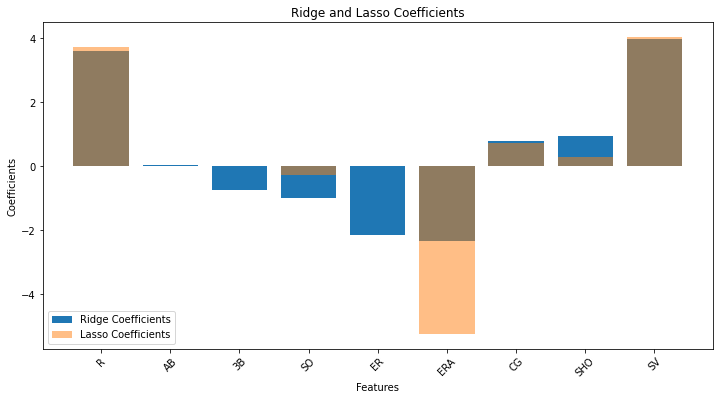

In [19]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt



X = df.drop(columns=['W','H','2B','HR','BB','SB','RA','E'])  
y = df['W']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=4.0)  
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.5)  
lasso_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the models
ridge_mse = sqrt(mean_squared_error(y_test, ridge_predictions))
lasso_mse = sqrt(mean_squared_error(y_test, lasso_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Ridge Regression Mean Squared Error:", ridge_mse)
print("Lasso Regression Mean Squared Error:", lasso_mse)

print("Ridge Regression R-squared:", ridge_r2)
print("Lasso Regression R-squared:", lasso_r2)



# Visualize the coefficients of Ridge and Lasso models (optional)
ridge_coeffs = ridge_model.coef_
lasso_coeffs = lasso_model.coef_

plt.figure(figsize=(12, 6))
plt.bar(range(len(X.columns)), ridge_coeffs, label='Ridge Coefficients')
plt.bar(range(len(X.columns)), lasso_coeffs, label='Lasso Coefficients', alpha=0.5)
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.legend()
plt.title('Ridge and Lasso Coefficients')
plt.show()


## Conclusion Feature Selection , has incread the Model's accuracy and decreased the error. 

# MODEL 3 :
##  FEATURE ENGINEERING 

In [20]:
new_df =df

### 1. Batting Average (BA):
Batting Average is the ratio of hits (H) to at-bats (AB).
Formula: BA = H / AB

In [21]:
new_df['BA'] = new_df['H'] / new_df['AB']

# 2. Slugging Percentage (SLG):
Slugging Percentage (SLG) measures a batter's power hitting ability. It is calculated as the total bases (TB) divided by at-bats (AB).
Formula: SLG = TB / AB
TB = H + 2B + 3B * 2 + HR*3

In [22]:
new_df['TB'] = new_df['H']+new_df['2B']+ (new_df['3B']*2) + (new_df['HR']*3)
new_df['SLG'] = new_df['TB']/new_df['AB']

# 3. On-Base Percentage (OBP):
Create a new feature for on-base percentage, which measures a team's ability to get on base. OBP is calculated as :
(H + BB) / (AB + BB).

In [23]:
new_df['OBP'] = (new_df['H']+new_df['BB'])/(new_df['AB']+new_df['BB'])

# 4. OPS can be calculated by adding on-base percentage (OBP) and slugging percentage (SLG)

In [24]:
new_df['OPS'] = new_df['OBP'] + new_df['SLG']

# 5. WHIP = (BB+ H ) / IP 

IP = 9*ER/ERA

In [25]:
new_df['IP'] = (new_df['ER']*9)/new_df['ERA']

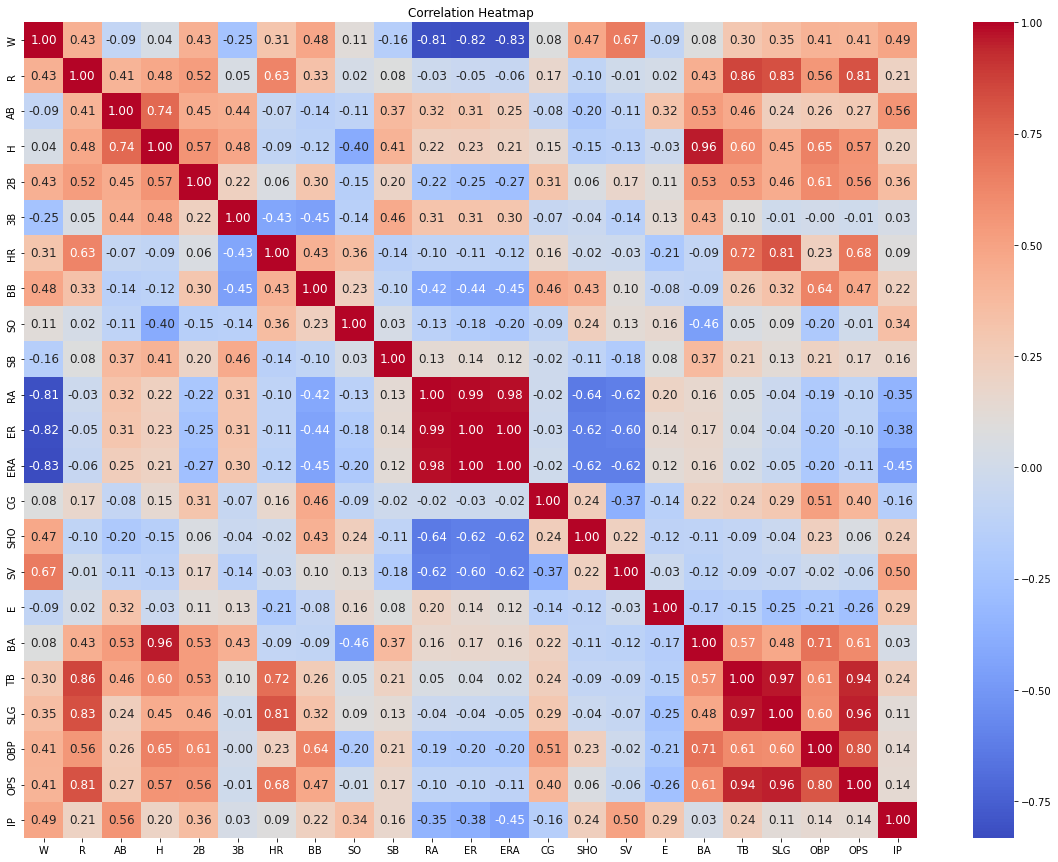

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

## Lets See which feature is contributing the most in Model's Performance

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming X is your feature matrix and y is your target variable
X = new_df.drop(columns=['W'])
y = new_df['W']

# Initialize Ridge regression model
ridge_model = Ridge()

# Fit the model with all features
ridge_model.fit(X, y)

# Initial R-squared value
initial_r2 = ridge_model.score(X, y)

# Create a list to store R-squared values
r2_values = [initial_r2]

# Feature names
feature_names = X.columns

# Perform iterative feature dropping
for feature_name in feature_names:
    # Copy the feature matrix, excluding the current feature
    X_subset = X.drop(columns=[feature_name])
    
    # Fit the model with the subset of features
    ridge_model.fit(X_subset, y)
    
    # Calculate R-squared and append to the list
    r2 = ridge_model.score(X_subset, y)
    r2_values.append(r2)
    print(feature_name)
    print(r2)


R
0.8865638128112827
AB
0.9104981498158395
H
0.9404795386189329
2B
0.9404795319697264
3B
0.9404795253671971
HR
0.9404795628746663
BB
0.9391343047460625
SO
0.9369653599478093
SB
0.9388279608843569
RA
0.9396193879221099
ER
0.9404104401178555
ERA
0.9404777180227859
CG
0.9395851933201487
SHO
0.9382097336335838
SV
0.9367448051901748
E
0.9399020871240497
BA
0.9404795624834744
TB
0.9404795503634165
SLG
0.940479561230222
OBP
0.9404795576744271
OPS
0.9404795514847168
IP
0.9119795234558834


## Selecting columns : R, AB, SO, SB, SHO, SV, IP ,ERA,'CG',OPS for the better model's performance

Mean Squared Error (MSE): 3.612342553727085
R-squared (R2): 0.9031013460980135


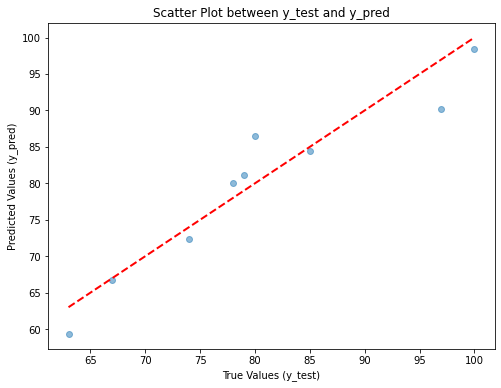

Lasso Regression Mean Squared Error: 4.422001317331621
Lasso Regression R-squared: 0.8547963194271094


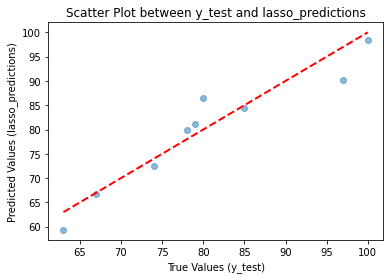

In [32]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Select the features
selected_features = ['R' ,'SO', 'SB', 'ERA', 'SHO', 'CG','SV', 'IP' ,'AB','OPS']

# Create the feature matrix (X) and target vector (y)
X = new_df[selected_features]
y = new_df['W']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Ridge Regression model
alpha = 0.1  # You can adjust the alpha hyperparameter for regularization
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


# Initialize a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot between y_pred and y_test
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Scatter Plot between y_test and y_pred")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()
# Show the plot


# Lasso Regression
lasso_model = Lasso(alpha=0.5)  
lasso_model.fit(X_train, y_train)


lasso_predictions = lasso_model.predict(X_test)

# Evaluate the models

lasso_mse = sqrt(mean_squared_error(y_test, lasso_predictions))

lasso_r2 = r2_score(y_test, lasso_predictions)


print("Lasso Regression Mean Squared Error:", lasso_mse)

print("Lasso Regression R-squared:", lasso_r2)

# Scatter plot between y_pred and y_test
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Scatter Plot between y_test and lasso_predictions")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (lasso_predictions)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV


# Create a Ridge regression model
ridge = Ridge()

# Define a range of hyperparameters to search through
param_grid = {
    'alpha': [0.1,0.5, 1.0]  # Regularization parameter
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)

# Generate some sample data (X and y)
X = np.random.rand(100, 5)
y = np.random.rand(100)

# Fit the model to the data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)

# You can also access the best model directly
best_ridge_model = grid_search.best_estimator_


Best hyperparameters:  {'alpha': 1.0}


# Conclusion :
## Ridge Regulasation Gives the best Model's Performance with 90% accuracy. 